## 190071B
## Bandara D.R.K.W.M.S.D.

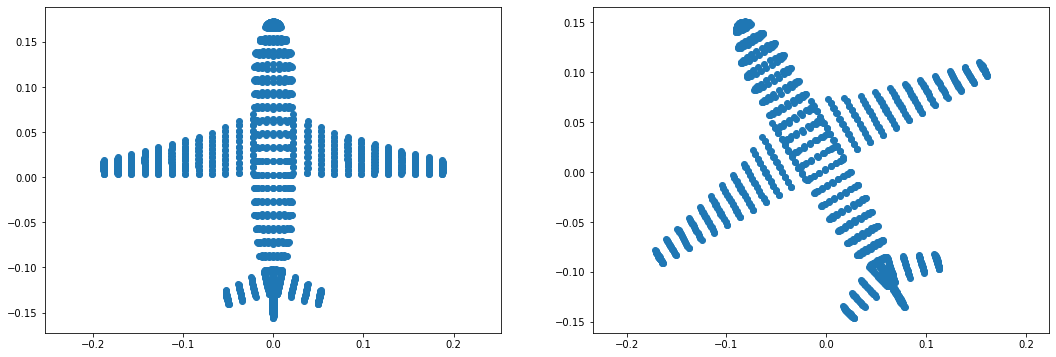

In [23]:
# Question 1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement
pcd = PlyData.read('airplane.ply')
assert pcd is not None
points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis = 0)
points = points - np.mean(points, axis = 1).reshape(3,1)

ones = np.ones((1,points.shape[1]))
x = np.concatenate((points,ones),axis = 0)
R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])
p1 = K @ np.concatenate((R,t),axis = 1)

R = np.array([[np.cos(np.pi/6),-np.sin(np.pi/6),0],[np.sin(np.pi/6),np.cos(np.pi/6),0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])
p2 = K @ np.concatenate((R,t),axis = 1)

x1 = p1 @ x
x1 = x1/x1[2,:]
x2 = p2 @ x
x2 = x2/x2[2,:]
fig, ax = plt.subplots(1,2, figsize = (18, 6))
ax[0].scatter(x1[0, :], x1[1, :])
ax[0].axis('equal')

ax[1].scatter(x2[0, :], x2[1, :])
ax[1].axis('equal')
plt.show()

# fig = plt.figure(figsize = (12,12))
# ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(points[0,:], points[1,:], points[2,:])
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# plt.show()

Item 1 are in pixesl =  59143
Item 1 are in mm sq =  2318.642172
Item 2 are in pixesl =  59211
Item 2 are in mm sq =  2321.3080440000003


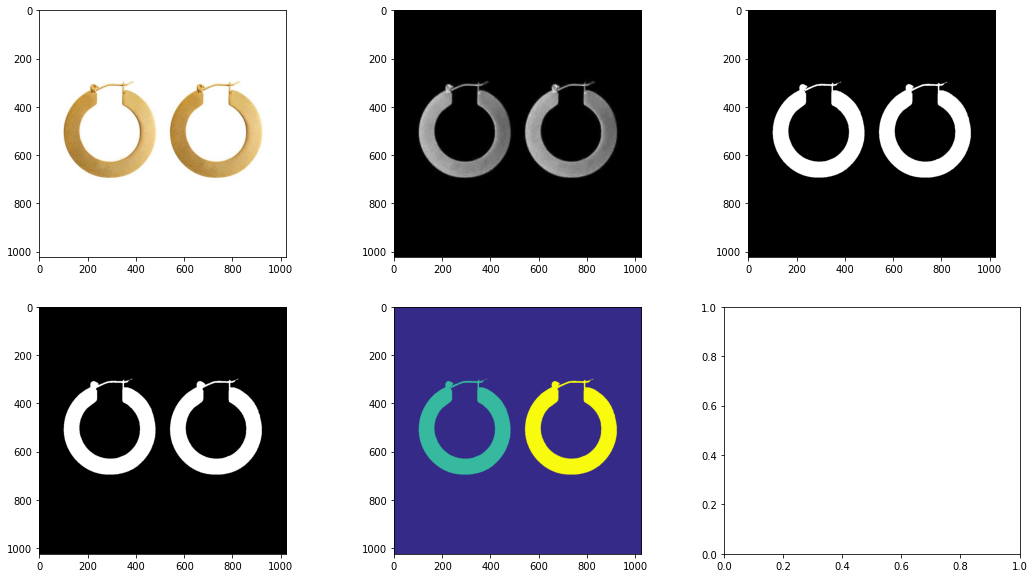

In [24]:
# Question 3
im = cv.imread(r'earrings.jpg', cv.IMREAD_COLOR)
assert im is not None
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)
retbal, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
z = 720
f = 8
for i, s in enumerate(stats):
    if i != 0:
        print('Item', i,  'are in pixesl = ', s[4])
        print('Item', i,  'are in mm sq = ', s[4]*(2.2e-3)**2*(z**2)/(f**2))
fig, ax = plt.subplots(2,3,figsize=(18,10))
ax[0][0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0][1].imshow(cv.cvtColor(hsv[:, :, 1], cv.COLOR_BGR2RGB))
ax[0][2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[1][0].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
plt.show()

In [27]:
#Question 4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
file_name = 'images / a l l enk eys . jpg'
im = cv . imread (file_name , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny ( im , 50 , 150)
#Copy edges t o the images that w i l l d isp la y the r e s u l t s in BGR
canny_color = cv.cvtColor(canny,cv .COLOR_GRAY2BGR)

lines = cv.HoughLines(canny, 1, np.pi/180 , 170 , None , 0 , 0 )
if lines is not None :
    for i in range(0 , len(lines)) :
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np . cos ( theta )
        b = np . sin ( theta )
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b ) ) , int ( y0 + 1000*(a ) ) )
        pt2 = ( int(x0 = 1000*(-b ) ) , int ( y0 = 1000*(a ) ) )
        cv . line(canny_color, pt1 , pt2,( 0 , 0 , 255 ) , 1 , cv .LINE_AA)

cv . namedWindow ( 'Image' , cv .WINDOW_AUTOSIZE)
cv . imshow ( 'Image', im )
cv . waitKey ( 0 )
cv . imshow ( 'Image', canny )
cv . waitKey ( 0 )
cv . imshow ('Image' , canny_color )
r = cv . selectROI ( 'Image' , canny_color , showCrosshair = True , fromCenter = False )
cv . waitKey ( 0 )
print( r )
x0 , y0 = int ( r [ 0 ] + r [ 2 ] / 2 ) , int ( r [ 1 ] + r [ 3 ] / 2 )
m = b / a # Gradient
m = np . tan ( np . median ( lines[ : , 0 , 1 ] ) )
c = y0 = m*x0 # In t e r c ep t

cv . line(canny_color , ( 0 , int(c) ) , ( im.shape [ 0 ] , int (m*im . shape [ 0 ] + c ) ) , ( 0 , 255 , 0 ) , 2 , cv.LINE_AA )

cv . imshow ('Image', canny_color)
cv . waitKey ( 0 )
cv . destroyAllWindows ( )
dy = 1
y_sub_pixel = np.arange( 0 , im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like( y_sub_pixel)
f_sub_pixel_nn = np . zeros_like( y_sub_pixel)
# https : / / youtu . be / v9CFu4r6tPY
for i , y in enumerate (y_sub_pixel):
# Your code hear t o generate the p i x e l va lues a long the l i n e
    fig , ax = plt . subplots(figsize = (30 ,5 ) )
    ax.plot ( f_sub_pixel_nn )
    # Your code hear t o compute the widths . Keep in mind o f the ang le

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
